# Stock Price Exploration & Analysis - Kaushal Rao 
### This analysis focuses on bank stocks and and how they progressed through the financial crisis (2007-2008) all the way until early 2016. More information on the financial crisis can be found here: https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008. 

### For this project, we will be using pandas to directly read in data from Stooq. 

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
# importing relevant modules

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)
# relevant timeframe 

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

# importing data

In [4]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
# creating a list of ticker symbols (as strings) in alphabetical order

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
# concatenating bank dataframes together into a single dataframe 
# keys is set to the tickers list 

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
# setting column name levels 

In [8]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.731  41.958  41.044  41.872  18323290.0  440.07  443.45   
2006-01-04   41.801  42.017  41.312  41.428  19966326.0  438.82  440.96   
2006-01-05   41.428  41.650  41.197  41.481  16666543.0  435.02  438.07   
2006-01-06   41.622  41.721  41.225  41.419  14161016.0  438.98  439.15   
2006-01-09   41.552  41.775  41.232  41.446  17561765.0  436.45  437.71   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   432.05  442.67  1712139.0  ...  40.034  40.954  39.727  40.827   
2006-01-04   434.20  434.48  2083320.0  ...  41.106  41.510  40.860  40.860   
2006-01-05   434.66  436.62  1264127.0  ...  40.860  41.028  40.622  40.971   
2006-01-06   432.87  436.62  1525744.0  ...  41.154  41.205  40.649  41.012   
2006-01-09   433.75  434.57  1871527.0  ...  41.051  41.518  41.043  41.441   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6374568.0  23.702  23.986  23.403  23.927  14687538.0  
2006-01-04   9457881.0  23.849  23.864  23.520  23.649  14492354.0  
2006-01-05   6849966.0  23.626  23.664  23.482  23.626  13507351.0  
2006-01-06   8168027.0  23.689  23.829  23.545  23.760  11204308.0  
2006-01-09   4913405.0  23.760  23.864  23.664  23.760   7492296.0  

[5 rows x 30 columns]

## Exploratory Data Analysis (EDA)

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
# max close price for each bank's stock during the time period 

Bank Ticker
BAC     48.825
C      506.600
GS     215.190
JPM     61.008
MS      62.530
WFC     49.079
dtype: float64

In [10]:
returns = pd.DataFrame()
# creating a new dataframe to contain the returns for each bank's stock 

Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()
# returns values in terms of percentages 

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010604,-0.018501,-0.013590,-0.014228,0.000808,-0.011619
2006-01-05,0.001279,0.004925,-0.000363,0.003051,0.002717,-0.000973
2006-01-06,-0.001495,0.000000,0.013873,0.007064,0.001001,0.005672
2006-01-09,0.000652,-0.004695,0.012162,0.016236,0.010460,0.000000


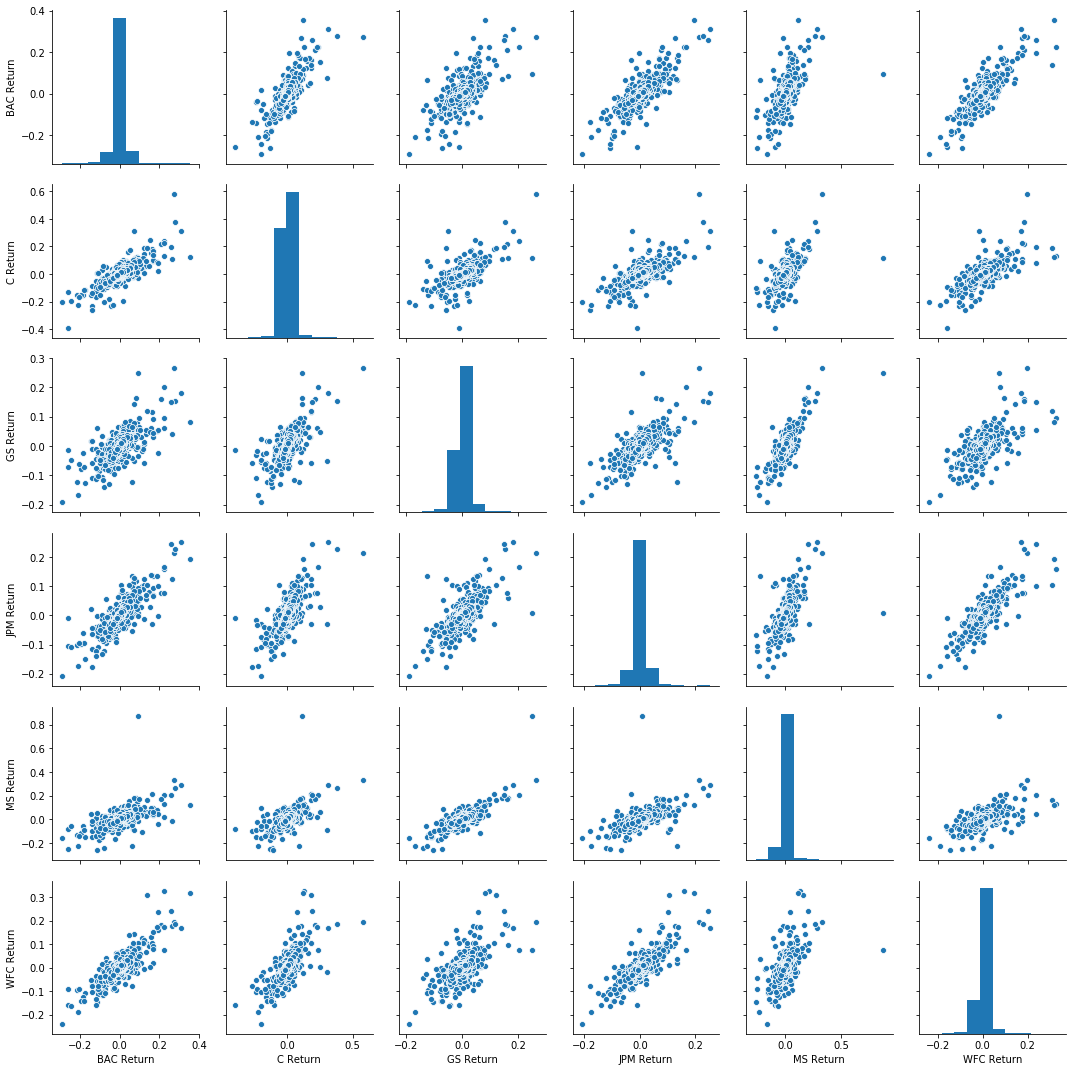

In [12]:
sns.pairplot(returns[1:])
# plotting pairplot of stock returns 

In [13]:
# worst drop for the stocks (4 of them on Obama's inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [14]:
# best single day gain
# Citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [15]:
returns.std() 
# Citigroup riskiest in this time period, highest std 

BAC Return    0.036604
C Return      0.038616
GS Return     0.025370
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030220
dtype: float64

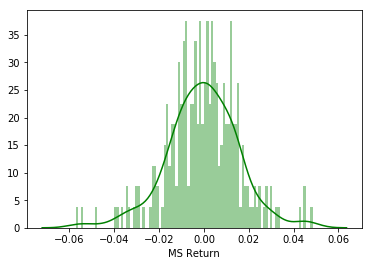

In [16]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)
# 2015 returns of Morgan Stanley

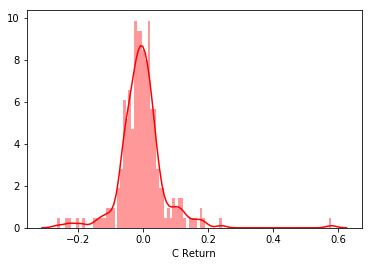

In [17]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)
# 2008 returns for Citigroup

## More Visualization

In [18]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

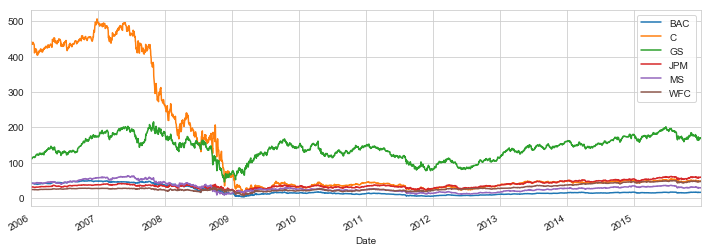

In [19]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
# line plot showing close price for each bank in the time period 
# Citigroup didn't recover from their 2008-2009 crash in the time period 

In [20]:
# plotly iplot 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Heatmaps

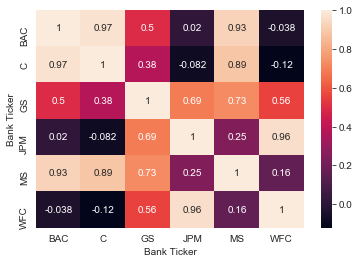

In [21]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
# heatmap of the correlation between stocks' close price 

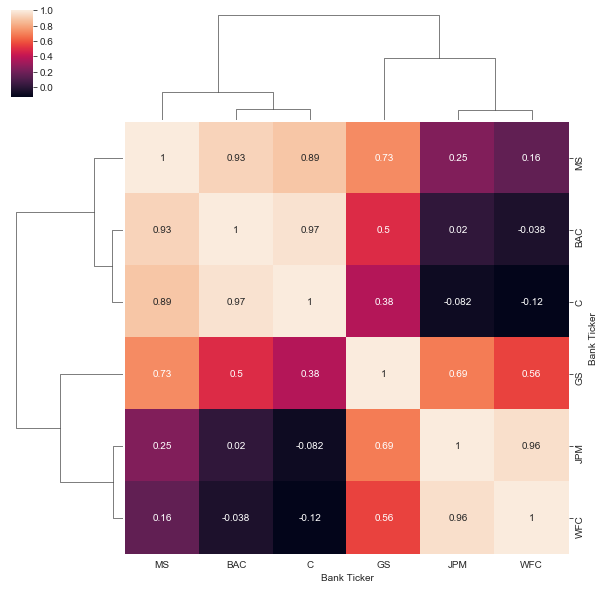

In [22]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
# clustermap 

In [23]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')
# plotly iplot of correlations 